In [1]:
### basic
import sys
sys.path.append('../')
from config_sing import *
from config_func import *

plt.style.use('seaborn-whitegrid')

In [2]:
from umap             import UMAP
from sklearn.manifold import TSNE

In [3]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
os.listdir(fdiry)

['dat_output_TileMPRA_zoom1_count_1e4.csv',
 'dat_test_ASTARR_zoom1_count.csv',
 'dat_output_ASTARR_zoom1.csv',
 'dat_test_TileMPRA_zoom1_score.csv',
 'dat_output_ASTARR_zoom1_score_1e5.csv',
 'X_umap_output_zoom1_score.npy',
 'dat_output_TileMPRA_1e5.csv',
 '.ipynb_checkpoints',
 'dat_test_ASTARR_zoom1_score.csv',
 'dat_output_TileMPRA.csv',
 'dat_output_TileMPRA_zoom1.csv',
 'dat_output_ASTARR_score_1e4.csv',
 'dat_output_ASTARR_zoom1_count_1e5.csv',
 'embedder_TileMPRA.P',
 'dat_output_ASTARR_zoom1_count_1e4.csv',
 'dat_output_ASTARR_1e5.csv',
 'dat_output_ASTARR_zoom1_score_1e4.csv',
 'dat_output_TileMPRA_zoom1_score_1e4.csv',
 'dat_test_TileMPRA_zoom1_count.csv',
 'dat_output_ASTARR_count_1e4.csv',
 'dat_output_TileMPRA_zoom1_count.csv',
 'dat_output_TileMPRA_zoom1_score.csv',
 'embedder_TileMPRA_trn_epochs_05.P',
 'dat_output_ASTARR.csv',
 'dat_annot_TileMPRA.csv']

In [4]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_test_ASTARR_zoom1_score.csv"
fpath = os.path.join(fdiry, fname)

dat_astarr = pd.read_csv(fpath)
print(dat_astarr.shape)
dat_astarr.head()

(78259, 281)


,Sample,Count,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,Input_rep1,1,chrX_48780017_48780199,chrX,48780017,48780199,48780108,0.565934,-12.769107,-13.386689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Input_rep1,1,chrX_48780026_48780218,chrX,48780026,48780218,48780122,0.557292,-12.830641,-13.474395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Input_rep1,1,chrX_48780036_48780225,chrX,48780036,48780225,48780131,0.555556,-12.870405,-13.474395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Input_rep1,1,chrX_48780030_48780280,chrX,48780030,48780280,48780155,0.492000,-12.988914,-13.345469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Input_rep1,1,chrX_48780025_48780333,chrX,48780025,48780333,48780179,0.457792,-13.120371,-13.436881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_test_TileMPRA_zoom1_count.csv"
fpath = os.path.join(fdiry, fname)

dat_tmpra = pd.read_csv(fpath)
print(dat_tmpra.shape)
dat_tmpra.head()

(1746, 279)


,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,Log2fc,Mtf_FOX/1,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,chrX_48780001_48780200,chrX,48780001,48780200,48780101,0.552764,775.196760,724.091270,-0.096545,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chrX_48780051_48780250,chrX,48780051,48780250,48780151,0.512563,490.329907,685.302462,0.480485,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chrX_48780101_48780300,chrX,48780101,48780300,48780201,0.477387,287.330074,308.059810,0.103002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chrX_48780151_48780350,chrX,48780151,48780350,48780251,0.417085,38.837467,23.540292,-0.719225,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chrX_48780201_48780400,chrX,48780201,48780400,48780301,0.321608,69.147950,52.450160,-0.405771,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dat = dat_astarr
lst = [col for col in dat.columns if col.startswith('Mtf')]
df1 = dat[lst]

print(df1.shape)
df1.head()

(78259, 270)


,Mtf_FOX/1,Mtf_HD/20,Mtf_ZNF449,Mtf_RFX/1,Mtf_ZFN121,Mtf_PAX/2,Mtf_YY1,Mtf_NFKB/2,Mtf_SPZ1,Mtf_SIX/2,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,0.0,0.0,7.3633,13.6886,12.0497,10.9269,6.9956,7.1419,8.31,8.5261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,7.3633,13.6886,12.0497,10.9269,6.9956,7.1419,8.31,8.5261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0000,7.2977,22.1408,21.1600,6.9956,7.1419,8.31,8.5261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,7.3633,13.6886,22.1408,21.1600,6.9956,7.1419,8.31,8.5261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,7.3633,13.6886,22.1408,21.1600,6.9956,7.1419,8.31,8.5261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
dat = dat_tmpra
lst = [col for col in dat.columns if col.startswith('Mtf')]
df2 = dat[lst]

print(df2.shape)
df2.head()

(1746, 270)


,Mtf_FOX/1,Mtf_HD/20,Mtf_ZNF449,Mtf_RFX/1,Mtf_ZFN121,Mtf_PAX/2,Mtf_YY1,Mtf_NFKB/2,Mtf_SPZ1,Mtf_SIX/2,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X1 = df1.to_numpy()
X2 = df2.to_numpy()
#X  = dat.to_numpy()

print(X1.shape)
print(X2.shape)
#print(X.shape)

(78259, 270)
(1746, 270)


In [9]:
%%time
ump = UMAP()
X1_ump = ump.fit_transform(X1)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/opt/conda/lib/python3.7/site-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/opt/conda/lib/python3.7/site-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/opt/conda/lib/python3.7/site-packages/umap/s

CPU times: user 29min 4s, sys: 2min 38s, total: 31min 42s
Wall time: 16min 23s


In [22]:
%%time
ump = UMAP()
X2_ump = ump.fit_transform(X2)

CPU times: user 11.2 s, sys: 145 ms, total: 11.3 s
Wall time: 8.06 s


In [25]:
%%time
tsn = TSNE(n_components=2, verbose=1, init='pca', random_state=123)
X1_tsn = tsn.fit_transform(X1)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 78259 samples in 0.020s...


KeyboardInterrupt: 

In [26]:
%%time
tsn = TSNE(n_components=2, verbose=1, init='pca', random_state=123)
X2_tsn = tsn.fit_transform(X2)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1746 samples in 0.001s...
[t-SNE] Computed neighbors for 1746 samples in 0.170s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1746
[t-SNE] Computed conditional probabilities for sample 1746 / 1746
[t-SNE] Mean sigma: 3.599895


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.165710
[t-SNE] KL divergence after 1000 iterations: 0.916527
CPU times: user 25.9 s, sys: 293 ms, total: 26.2 s
Wall time: 13.6 s


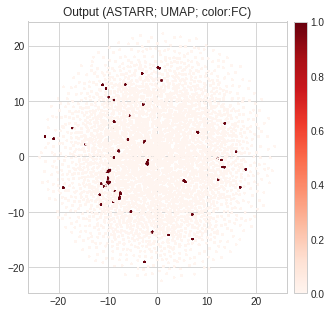

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Loc"]
c = (c > 48800000) & (c < (48800000+500))
c = c.to_numpy()

x = X1_ump[:,0]
y = X1_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (ASTARR; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

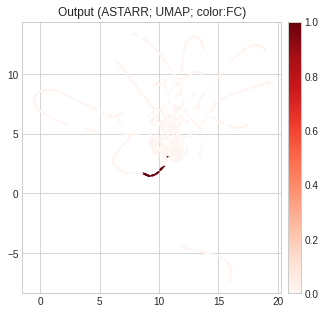

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_tmpra["Loc"]
c = (c > 48800000) & (c < (48800000+500))
c = c.to_numpy()

x = X2_ump[:,0]
y = X2_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (ASTARR; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Loc"]
#c = (c > 48800000) & (c < (48800000+500))
#c = c.to_numpy()

x = X1_tsn[:,0]
y = X1_tsn[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (ASTARR; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

In [33]:
dat_tmpra["Mtf_AP1/1"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1741    0.0
1742    0.0
1743    1.0
1744    1.0
1745    1.0
Name: Mtf_AP1/1, Length: 1746, dtype: float64

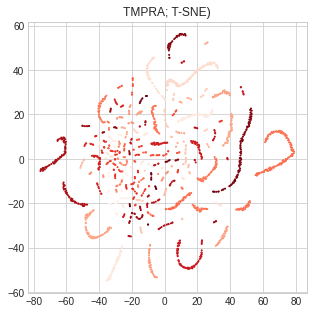

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_tmpra["Loc"]
#c = dat_tmpra["Mtf_AP1/1"]
#c = (c > 48800000) & (c < (48800000+500))
c = c.to_numpy()

x = X2_tsn[:,0]
y = X2_tsn[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("TMPRA; T-SNE)")
#set_colorbar(ax, im) 
plt.show()